## Лабораторная работа

## Обработка пропусков в данных, кодирование категориальных признаков, масштабирование данных.
#### Цель лабораторной работы: изучение способов предварительной обработки данных для дальнейшего формирования моделей.

#### Задание:

1. Выбрать набор данных (датасет), содержащий категориальные признаки и пропуски в данных. Для выполнения следующих пунктов можно использовать несколько различных наборов данных (один для обработки пропусков, другой для категориальных признаков и т.д.)
2. Для выбранного датасета (датасетов) на основе материалов лекции решить следующие задачи:
 - обработку пропусков в данных (не менее 3 признаков);
 - кодирование категориальных признаков (не менее 3 признаков);
 - масштабирование данных (не менее 3 признаков).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

### Загрузка и первичный анализ данных

In [41]:
df = pd.read_csv('train.csv')

In [27]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [28]:
df.shape

(1460, 81)

In [29]:
df.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [30]:
df.isna().sum()

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

###  1.Обработка пропусков в данных

#### -удаление или заполнение нулями

In [31]:
data = df.dropna(axis=1)
data.shape

(1460, 62)

удаление столбцов , содержащие пустые значения

In [32]:
data1 = df.dropna(axis=0)
data1.shape

(0, 81)

удаление строк, содержащие пустые значения

In [33]:
df2 = df.fillna(0)
df2.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,0,Reg,Lvl,AllPub,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,0,IR1,Lvl,AllPub,...,0,0,0,0,0,12,2008,WD,Normal,250000


Заполнение всех пропущенных значений нулями

### Обработка пропусков в числовых данных

In [74]:
num_cols = []
for col in df.columns:
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='float64' or dt=='int64'):
        num_cols.append(col)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}.'.format(col, dt, temp_null_count))

Колонка LotFrontage. Тип данных float64. Количество пустых значений 259.
Колонка MasVnrArea. Тип данных float64. Количество пустых значений 8.
Колонка GarageYrBlt. Тип данных float64. Количество пустых значений 81.


In [76]:
df_num = df[num_cols]
df_num

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


Фильтр по колонкам с пропущенными значениями

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1b525950>,
      dtype=object)

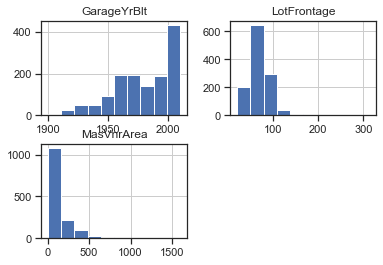

In [83]:
# Гистограмма по колонкам с пропущенными значениями
df_num.hist()

### Обработка пропусков в категориальных данных

In [84]:
cat_cols = []
for col in df.columns:
    temp_null_count = df[df[col].isnull()].shape[0]
    dt = str(df[col].dtype)
    if temp_null_count>0 and (dt=='object'):
        cat_cols.append(col)
        print('Колонка {}. Тип данных {}. Количество пустых значений {}.'.format(col, dt, temp_null_count))

Колонка Alley. Тип данных object. Количество пустых значений 1369.
Колонка MasVnrType. Тип данных object. Количество пустых значений 8.
Колонка BsmtQual. Тип данных object. Количество пустых значений 37.
Колонка BsmtCond. Тип данных object. Количество пустых значений 37.
Колонка BsmtExposure. Тип данных object. Количество пустых значений 38.
Колонка BsmtFinType1. Тип данных object. Количество пустых значений 37.
Колонка BsmtFinType2. Тип данных object. Количество пустых значений 38.
Колонка Electrical. Тип данных object. Количество пустых значений 1.
Колонка FireplaceQu. Тип данных object. Количество пустых значений 690.
Колонка GarageType. Тип данных object. Количество пустых значений 81.
Колонка GarageFinish. Тип данных object. Количество пустых значений 81.
Колонка GarageQual. Тип данных object. Количество пустых значений 81.
Колонка GarageCond. Тип данных object. Количество пустых значений 81.
Колонка PoolQC. Тип данных object. Количество пустых значений 1453.
Колонка Fence. Тип да

In [91]:
cat_temp_df = df[['BsmtQual']]
cat_temp_df['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', nan, 'Fa'], dtype=object)

In [101]:
cat_temp_df[cat_temp_df['BsmtQual'].isnull()].shape

(37, 1)

In [102]:
from sklearn.impute import SimpleImputer
imp2 = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_imp2 = imp2.fit_transform(cat_temp_df)
df_imp2

array([['Gd'],
       ['Gd'],
       ['Gd'],
       ...,
       ['TA'],
       ['TA'],
       ['TA']], dtype=object)

Импьютация наиболее частыми значениями

In [103]:
np.unique(df_imp2)

array(['Ex', 'Fa', 'Gd', 'TA'], dtype=object)

Пустые значения отсутствуют

###  2.Преобразование категориальных признаков в числовые


In [104]:
cat_enc = pd.DataFrame({'c1':df_imp2.T[0]})
cat_enc

,c1
0,Gd
1,Gd
2,Gd
3,TA
4,Gd
...,...
1455,Gd
1456,Gd
1457,TA
1458,TA


#### Кодирование категорий целочисленными значениями

In [105]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [106]:
le = LabelEncoder()
cat_enc_le = le.fit_transform(cat_enc['c1'])

In [107]:
cat_enc_le

array([2, 2, 2, ..., 3, 3, 3])

In [109]:
np.unique(cat_enc_le)

array([0, 1, 2, 3])

Уникальные числовые значения вместо категориальных 

 #### Кодирование категорий наборами бинарных значений

In [110]:
ohe = OneHotEncoder()
cat_enc_ohe = ohe.fit_transform(cat_enc[['c1']])

In [112]:
cat_enc_ohe.toarray()

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.]])

#### Быстрый вариант one-hot кодирования

In [113]:
pd.get_dummies(cat_enc)

,c1_Ex,c1_Fa,c1_Gd,c1_TA
0,0,0,1,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0
...,...,...,...,...
1455,0,0,1,0
1456,0,0,1,0
1457,0,0,0,1
1458,0,0,0,1


### 3. Масштабирование данных

In [114]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer

#### MinMax масштабирование

In [115]:
sc1 = MinMaxScaler()
sc1_df = sc1.fit_transform(df[['SalePrice']])

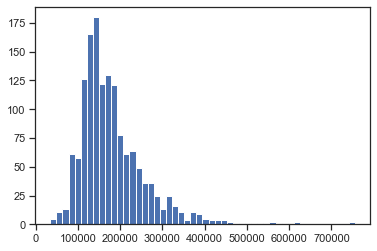

In [126]:
plt.hist(data['SalePrice'], 50)
plt.show()

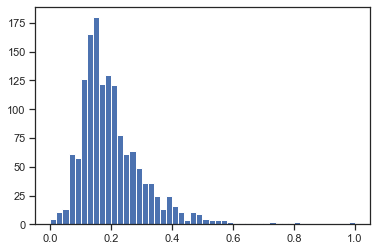

In [128]:
plt.hist(sc1_df, 50)
plt.show()

В этом случае значения лежат в диапазоне от 0 до 1.

#### Масштабирование данных на основе Z-оценки

In [132]:
sc2 = StandardScaler()
sc2_df = sc2.fit_transform(df[['SalePrice']])

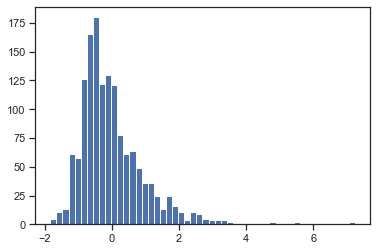

In [133]:
plt.hist(sc2_df, 50)
plt.show()

#### Нормализация данных

In [135]:
sc3 = Normalizer()
sc3_df = sc3.fit_transform(df[['SalePrice']])

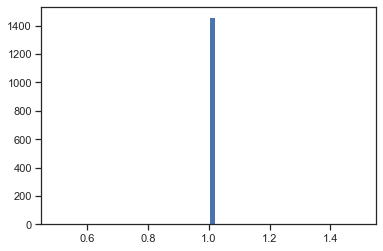

In [136]:
plt.hist(sc3_df, 50)
plt.show()